Homework 3  
Compiled with  
\$ jupyter nbconvert --to pdf Homework3.

<!-- Maybe use the --execute flag -->

# Neural Networks

In this problem we will analyze a simple neural network to understand its classification properties. Consider the neural network given in the figure below, with ReLU activation functions (denoted by $f$) on all neurons, and a softmax activation function in the output layer:

![Abeskønt](figs/NN1_simpleNN.png)

Given an input $x = [x_1, x_2]^T$, the hidden units in the network are activated in stages as described by the following equations:


\begin{align*}
z_1 &= x_1 W_{11} + x_2 W_{21} + W_{01}        \quad\quad       f(z_1)\ = \text{max}\{z_1,0 \}\\
z_2 &= x_1 W_{12} + x_2 W_{22} + W_{02}        \quad\quad       f(z_2)\ = \text{max}\{z_2,0 \}\\
z_3 &= x_1 W_{13} + x_2 W_{23} + W_{03}        \quad\quad       f(z_3)\ = \text{max}\{z_3,0 \}\\
z_4 &= x_1 W_{14} + x_2 W_{24} + W_{04}        \quad\quad       f(z_4)\ = \text{max}\{z_4,0 \}\\
\end{align*}



\begin{align*}
u_1 &= f(z_1) V_{11} + f(z_2) V_{21} + f(z_3) V_{31} + f(z_4) V_{41} + V_{01}        \quad\quad       f(u_1)\ = \text{max}\{u_1,0 \}\\
u_2 &= f(z_1) V_{12} + f(z_2) V_{22} + f(z_3) V_{32} + f(z_4) V_{42} + V_{02}        \quad\quad       f(u_2)\ = \text{max}\{u_2,0 \}\\
\end{align*}


The final output of the network is obtained by applying the softmax function to the last hidden layer,

\begin{align*}
o_1 &= \dfrac{e^{f(u_1)}}{e^{f(u_1)} + e^{f(u_2)}}\\
o_2 &= \dfrac{e^{f(u_2)}}{e^{f(u_1)} + e^{f(u_2)}}\\
\end{align*}

In this problem we will consider the following set of parameters:

$$
\begin{bmatrix} 
W_{11}  & W_{21}    &   W_{01}\\
W_{12}  & W_{22}    &   W_{02}\\
W_{13}  & W_{23}    &   W_{03}\\
W_{14}  & W_{24}    &   W_{04}
\end{bmatrix}
=
\begin{bmatrix}
1   &   0   &   -1\\
0   &   1   &   -1\\
-1  &   0   &   -1\\
0   &   -1  &   -1\\
\end{bmatrix}
$$

$$
\begin{bmatrix} 
V_{11}  & V_{21}    &   V_{31}  & V_{41}  & V_{01}\\
V_{12}  & V_{22}    &   V_{32}  & V_{42}  & V_{02}
\end{bmatrix}
=
\begin{bmatrix}
1   &   1   &   1 & 1&0\\
-1   &  -1   &   -1&-1&2\\
\end{bmatrix}
$$

## Feed forward step ##

Consider the input $x_1=3$, $x_2=14$. What is the final output $(o_1, o_2)$ of the network?

In [121]:
import math
from math import exp
f = lambda x: max(0,x)
fexp = lambda input: map(lambda x: exp(f(x)), input)
softmax = lambda input: list(map(lambda x: x/sum(fexp(input)), fexp(input)))
inner_vv = lambda v1, v2: sum(map(lambda x, y: x*y, v1, v2))
inner_Mv = lambda M, v: [inner_vv(M_row, v) for M_row in M]

W = [[1, 0, -1], [0, 1, -1], [-1, 0, -1], [0, -1, -1]]
V = [[1,1,1,1,0], [-1,-1,-1,-1,2]]
x = [3, 14]

z = inner_Mv(W, [*x, 1])
fz = list(map(f, z))

u = inner_Mv(V, [*fz, 1])

print(softmax(u))

print("Alternatively:")
from functools import reduce
# print(f"o1 = e^{f(u[0])}/({reduce(lambda x,y: x+'+'+ y, ('e^' + str(f(x)) for x in u))})")
# print(f"o2 = e^{f(u[1])}/({reduce(lambda x,y: x+'+'+ y, ('e^' + str(f(x)) for x in u))})")

print(reduce(lambda x,y: x+'\n' + y, (f"o{the_index +1} = e^{f(the_u)}/({reduce(lambda x,y: x+'+'+ y, ('e^' + str(f(x)) for x in u))})" for the_index, the_u in enumerate(u))))

[0.9999996940977731, 3.059022269256247e-07]
Alternatively:
o1 = e^15/(e^15+e^0)
o2 = e^0/(e^15+e^0)


## Decision Boundaries

In this problem we visualize the “decision boundaries" in $x$-space, corresponding to the four hidden units. These are the lines in $x$-space where the values of $z_1,\ z_2,\ z_3,\ z_4$ are exactly zero. Plot the decision boundaries of the four hidden units using the parameters of $W$  provided above.

Enter below the area of the region of your plot that corresponds to a negative ($<0$) value for all of the four hidden units.

**Answer**

Line1:   
\begin{align*}
x_1 W_{11} + x_2 W_{21} + W_{01} = 0\\
x_1 - 1 = 0\\
x_1 = 1
\end{align*}

Line2:   
\begin{align*}
x_1 W_{12} + x_2 W_{22} + W_{02} = 0\\
x_2 - 1 = 0\\
x_2 = 1
\end{align*}

Line3:   
\begin{align*}
x_1 W_{13} + x_2 W_{23} + W_{03} = 0\\
-x_1 - 1 = 0\\
x_1 = -1
\end{align*}

Line4:   
\begin{align*}
x_1 W_{14} + x_2 W_{24} + W_{04} = 0\\
-x_2 - 1 = 0\\
x_2 = -1
\end{align*}


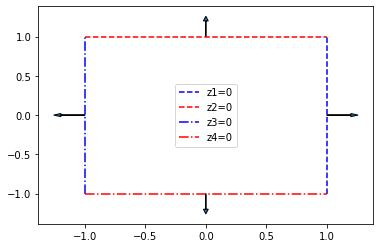

Area = 4 units


In [191]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot([1, 1],[-1,1], 'b--', label='z1=0')
plt.arrow(1,0, 0.2* W[0][0], 0.2 * W[0][1], head_width=.04)
plt.plot([-1, 1],[1,1], 'r--', label='z2=0')
plt.arrow(0,1, 0.2* W[1][0], 0.2 * W[1][1], head_width=.04)
plt.plot([-1, -1],[-1,1], 'b-.', label='z3=0')
plt.arrow(-1,0, 0.2* W[2][0], 0.2 * W[2][1], head_width=.04)
plt.plot([-1, 1],[-1,-1], 'r-.', label='z4=0')
plt.arrow(0,-1, 0.2* W[3][0], 0.2 * W[3][1], head_width=.04)
plt.legend()
plt.show()
plt.close()

print('Area = 4 units')

## Output of Neural Network

Using the same matrix $V$ as above, what is the value of $o_1$ (accurate to at least three decimal places if responding numerically) in the following three cases?

Assuming that $f(z_1) + f(z_2) + f(z_3) + f(z_4) = 1$:

In [202]:
sums = 1
u = [sums +0 , -sums +2]
print(reduce(lambda x,y: x+'\n' + y, (f"o{the_index +1} = e^{f(the_u)}/({reduce(lambda x,y: x+'+'+ y, ('e^' + str(f(x)) for x in u))})" for the_index, the_u in enumerate(u))))
print('Values:', softmax(u))

o1 = e^1/(e^1+e^1)
o2 = e^1/(e^1+e^1)
Values: [0.5, 0.5]


Assuming that $f(z_1) + f(z_2) + f(z_3) + f(z_4) = 0$:

In [203]:
sums = 0
u = [sums +0 , -sums +2]
print(reduce(lambda x,y: x+'\n' + y, (f"o{the_index +1} = e^{f(the_u)}/({reduce(lambda x,y: x+'+'+ y, ('e^' + str(f(x)) for x in u))})" for the_index, the_u in enumerate(u))))
print('Values:', softmax(u))

o1 = e^0/(e^0+e^2)
o2 = e^2/(e^0+e^2)
Values: [0.11920292202211755, 0.8807970779778824]


Assuming that $f(z_1) + f(z_2) + f(z_3) + f(z_4) = 3$:

In [204]:
sums = 3
u = [sums +0 , -sums +2]
print(reduce(lambda x,y: x+'\n' + y, (f"o{the_index +1} = e^{f(the_u)}/({reduce(lambda x,y: x+'+'+ y, ('e^' + str(f(x)) for x in u))})" for the_index, the_u in enumerate(u))))
print('Values:', softmax(u))

o1 = e^3/(e^3+e^0)
o2 = e^0/(e^3+e^0)
Values: [0.9525741268224333, 0.04742587317756678]


## Inverse temperature

Just math.. fuck it

# LSTM

The diagram below shows a single LSTM unit that consists of Input, Output, and Forget gates.

![](figs/LSTM_unit.png)

The behavior of such a unit as a recurrent neural network is specified by a set of update equations. These equations define how the gates, “memory cell" $c_t$ and the “visible state" $h_t$ are updated in response to input $x_t$ and previous states $c_{t-1}$, $h_{t-1}$. For the LSTM unit,

\begin{align*}
f_t &= \text{sigmoid}(W^{f,h}h_{t-1}\ +\ W^{f,x}x_t\ +\ b_f)\\
i_t &= \text{sigmoid}(W^{i,h}h_{t-1}\ +\ W^{i,x}x_t\ +\ b_i)\\
o_t &= \text{sigmoid}(W^{o,h}h_{t-1}\ +\ W^{o,x}x_t\ +\ b_o)\\
c_t &= f_t \odot c_{t-1} + i_t \odot \text{tanh}(W^{c,h}h_{t-1} + W^{c,x}x_t + b_c)\\
h_t &= o_t \odot  \text{tanh}(c_t)\\
\end{align*}

where symbol $\odot$ stands for element-wise multiplication. The adjustable parameters in this unit are matrices $W^{f,h}$, $W^{f,x}$, $W^{i,h}$, $W^{i,x}$, $W^{o,h}$, $W^{o,x}$, $W^{c,h}$, $W^{c,x}$ as well as the offset parameter vectors $b_f$, $b_i$, $b_o$, and $b_c$. By changing these parameters, we change how the unit evolves as a function of inputs $x_t$.

To keep things simple, in this problem we assume that $x_t$, $c_t$, and $h_t$ are all scalars. Concretely, suppose that the parameters are given by:
$$\begin{array}{llll}
W^{f,h} = 0 &   W^{f,x} = 0     &   b_f = -100  &   W^{c,h} = -100\\
W^{i,h} = 0 &   W^{i,x} = 100   &   b_i = 100   &   W^{c,x} = 50\\
W^{o,h} = 0 &   W^{o,x} = 100   &   b_o = 0     &   b_c = 0\\
\end{array}$$

We run this unit with initial conditions $h_{-1} = 0$ and $c_{-1}=0$, and in response to the following input sequence: [0, 0, 1, 1, 1, 0] (For example, $x_0=0$, $x_1 = 0$, $x_2=1$, and so on).

## LSTM states

Calculate the values $h_t$ at each time-step and enter them below as an array $[h_0, h_1, h_2, h_3, h_4, h_5]$.

(Please round $h_t$ to the closest integer in every time-step. If $h_t = \pm 0.5$, then round it to $0$.
For ease of calculation, assume that $\text{sigmoid}(x)\approx 1$ and $\tanh(x)\approx1$ for $x\ge1$, and $\text{sigmoid}(x)\approx 0$ and $\tanh(x)\approx-1$ for $x\le-1$.)

In [233]:
Wfh = 0
Wih = 0
Woh = 0
Wfx = 0
Wix = 100
Wox = 100
b_f = -100
b_i = 100
b_o = 0
Wch = -100
Wcx = 50
b_c = 0

h_1 = 0
c_1 = 0
x = [0, 0, 1, 1, 1, 0]

sigmoid = lambda x: 1 if x>=1 else 0 if x<=-1 else 0.5*x + 0.5
tanh    = lambda x: 1 if x>=1 else -1 if x<=-1 else x

f = lambda ht_1, x_t, Wfx=Wfx, Wfh=Wfh, b_f=b_f:    sigmoid(Wfh * ht_1 + Wfx * x_t + b_f)
i = lambda ht_1, x_t, Wix=Wix, Wih=Wih, b_i=b_i:    sigmoid(Wih * ht_1 + Wix * x_t + b_i)
o = lambda ht_1, x_t, Wox=Wox, Woh=Woh, b_o=b_o:    sigmoid(Woh * ht_1 + Wox * x_t + b_o)

c = lambda ft, it, ct_1, ht_1, x_t, Wch=Wch, Wcx=Wcx, b_c=b_c:        ft * ct_1 + it * tanh(Wch * ht_1 + Wcx * x_t + b_c) 
h = lambda o_t, c_t:                                o_t * tanh(c_t)


ht_1 = [h_1]
ct_1 = [c_1]
for j in range(6):
    ft = f(ht_1[j], x[j])
    it = i(ht_1[j], x[j])
    ot = o(ht_1[j], x[j])
    ct_1.append( c(ft, it, ct_1[j], ht_1[j], x[j]) )
    ht_1.append( round(h(ot, ct_1[j+1])) )



print(ht_1[1:])

[0, 0, 1, -1, 1, 0]


## LSTM states 2

Now, we run the same model again with the same parameters and same initial conditions as in the previous question. The only difference is that our input sequence in now: [1, 1, 0, 1, 1].

Calculate the values $h_t$ at each time-step and enter them below as an array $[h_0, h_1, h_2, h_3, h_4, h_5]$.

In [236]:
x =  [1,1,0,1,1]

ht_1 = [h_1]
ct_1 = [c_1]
for j in range(5):
    ft = f(ht_1[j], x[j])
    it = i(ht_1[j], x[j])
    ot = o(ht_1[j], x[j])
    ct_1.append( c(ft, it, ct_1[j], ht_1[j], x[j]) )
    ht_1.append( round(h(ot, ct_1[j+1])) )

print(ht_1[1:])

[1, -1, 0, 1, -1]


# Backpropagation

One of the key steps for training multi-layer neural networks is stochastic gradient descent. We will use the back-propagation algorithm to compute the gradient of the loss function with respect to the model parameters.

Consider the $L$-layer neural network below:

![backpropagation](figs/backpropagation.png)


In the following problems, we will the following notation: $b_j^l$ is the bias of the $j^{th}$ neuron in the $l^{th}$ layer, $a_j^l$ is the activation of $j^{th}$ neuron in the $l^{th}$ layer, and $w_{jk}^l$ is the weight for the connection from the $k^{th}$ neuron in the $(l-1)^{th}$ layer to the $j^{th}$ neuron in the $l^{th}$ layer.

If the activation function is $f$ and the loss function we are minimizing is $C$, then the equations describing the network are:

\begin{align*}
a_j^l &= f\left(\sum\limits_k w_{jk}^la_k^{l-1} + b_j^l  \right)\\
\text{Loss} &= C(a^L) 
\end{align*}

Note that notations without subscript denote the corresponding vector or matrix, so that $a^l$ is activation vector of the $l^{th}$ layer, and $w^l$ is the weights matrix in $l^{th}$  layer.

For $l = 1, \ldots, L$.


## Computing the Error

Let the weighted inputs to the $d$ neurons in layer $l$ be defined as $z^l=w^la^{l-1} + b^l$, where $z^l\in\mathbb R^d$. As a result, we can also write the activation of layer $l$ as $a^l\equiv f(z^l)$, and the “error" of neuron $j$ in layer $l$ as $\delta_j^l\equiv \dfrac{\partial C}{\partial z_j^l}$. Let $\delta^l \in \mathbb R^d$ denote the full vector of errors associated with layer $l$.

Back-propagation will give us a way of computing $\delta^l$ for every layer.

Assume there are $d$ outputs from the last layer (i.e. $a^L \in \mathbb R^d$). What is $\delta_j^L$ for the last layer?

Loads of arithmetic later....